# Prodigy Infotech

### Done by : Seif Muhammed Wafikk

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.shape

(7728394, 46)

In [7]:
df.State.unique


<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

In [8]:
df1=df[df['State']=='CA']

In [9]:
df1.duplicated().sum()


0

In [10]:
d1f=df1.dropna(subset=['Precipitation(in)'])    
df1.shape


(1741433, 46)

In [11]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])
df1.shape

(1223324, 46)

In [12]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])
df1.shape

(1222570, 46)

In [13]:
df1['Weather_Condition'].value_counts()


Weather_Condition
Fair                       757055
Cloudy                     136294
Mostly Cloudy               97801
Partly Cloudy               78075
Light Rain                  37422
                            ...  
Light Snow Showers              1
Rain Showers                    1
Light Snow with Thunder         1
Sand / Windy                    1
Blowing Sand                    1
Name: count, Length: 76, dtype: int64

In [14]:
df_cat=df1.select_dtypes('object') # categorical values
df_num=df1.select_dtypes(np.number) #numerical values
df_cat=df_cat.drop('ID',axis=1) #dropping id from categorical

In [15]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,1222570
1,Source,3
2,Start_Time,919564
3,End_Time,1074784
4,Description,579784
5,Street,58486
6,City,1099
7,County,58
8,State,1
9,Zipcode,109898


In [16]:
len(df1['City'].unique())

1099

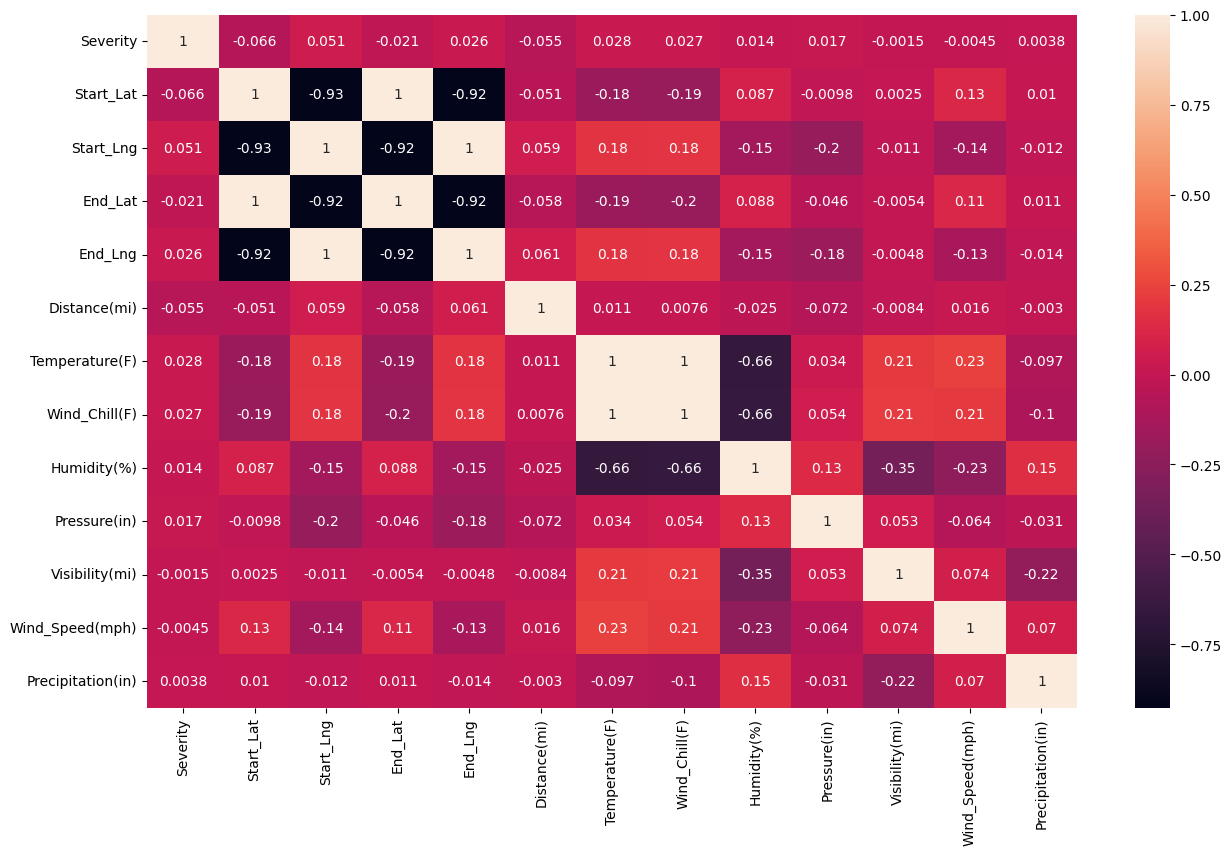

In [17]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)
plt.show()

In [18]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Los Angeles           104141
Sacramento             48339
San Diego              39373
San Jose               21581
Bakersfield            19109
                       ...  
La Mesa                    1
Desert Center              1
Desert Hot Springs         1
Warner Springs             1
Canyon Lake                1
Name: count, Length: 1099, dtype: int64

In [19]:
#top 10 cities by number of accident
accidents_by_cities[:10]

City
Los Angeles       104141
Sacramento         48339
San Diego          39373
San Jose           21581
Bakersfield        19109
Riverside          18845
San Bernardino     16544
Oakland            15236
Fresno             14981
Anaheim            14553
Name: count, dtype: int64

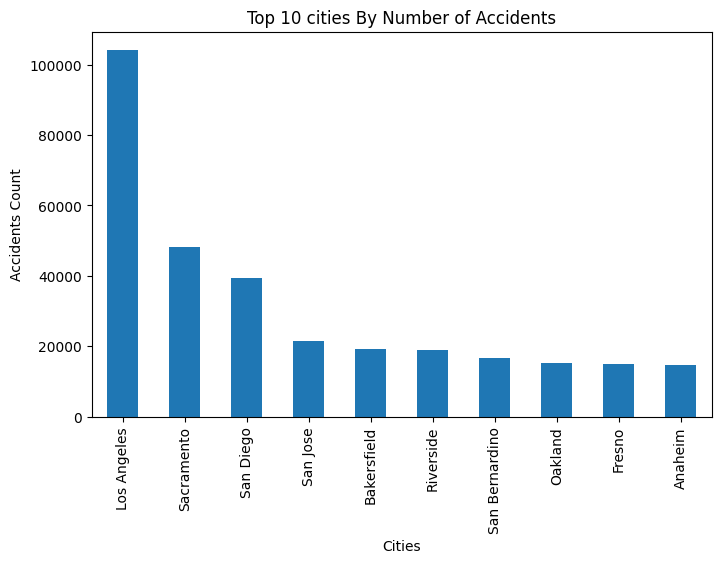

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [21]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1       9790
2    1111818
3      92966
4       7996
Name: ID, dtype: int64

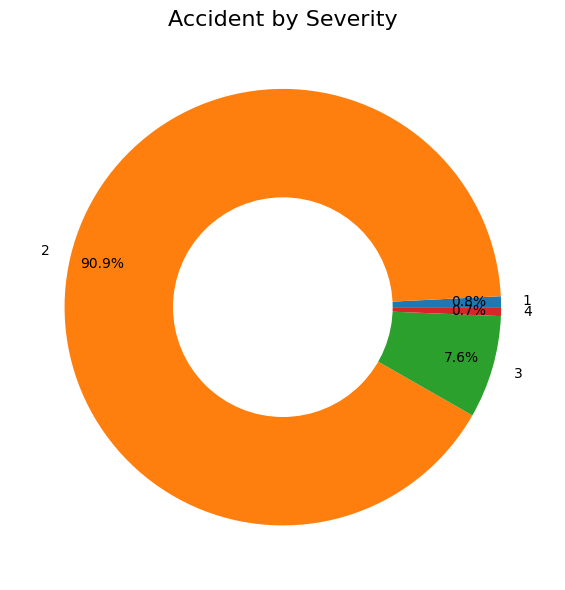

In [22]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [29]:
df1['Start_Time'].dtypes
df1['End_Time'].dtypes

dtype('O')

In [33]:
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], errors='coerce')
df1['End_Time'] = pd.to_datetime(df1['End_Time'], errors='coerce')

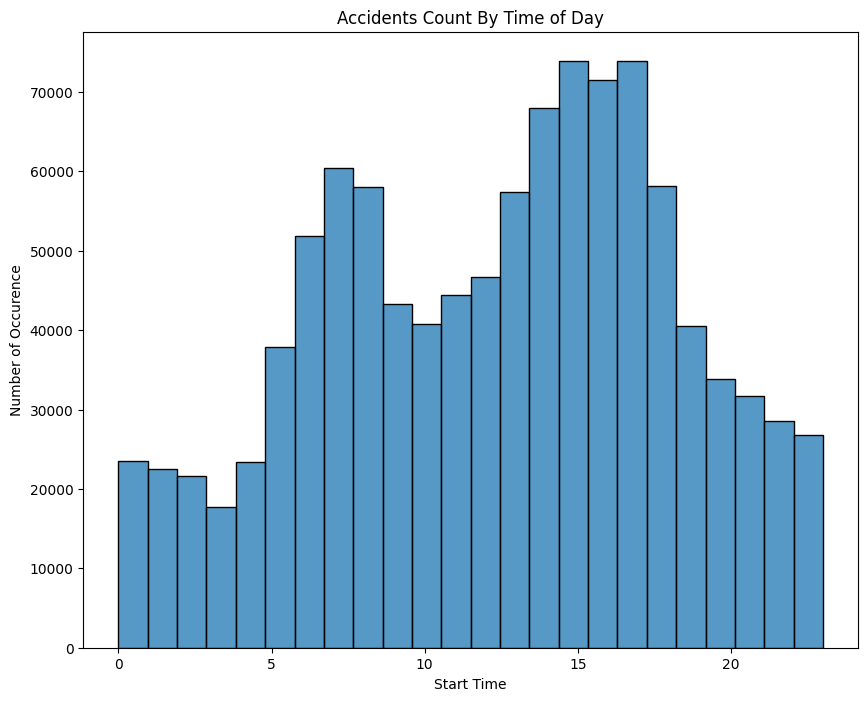

In [36]:

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

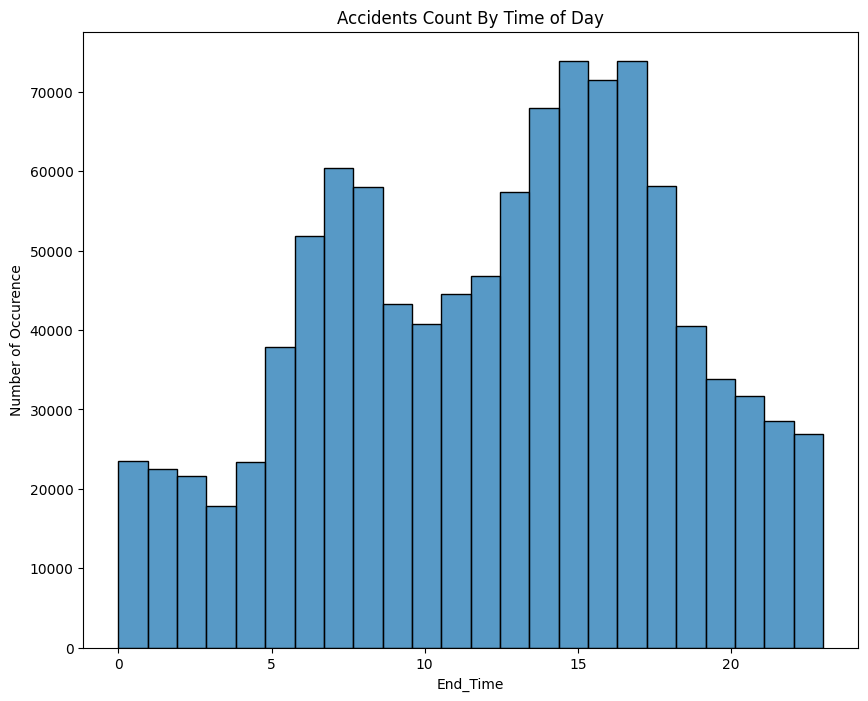

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

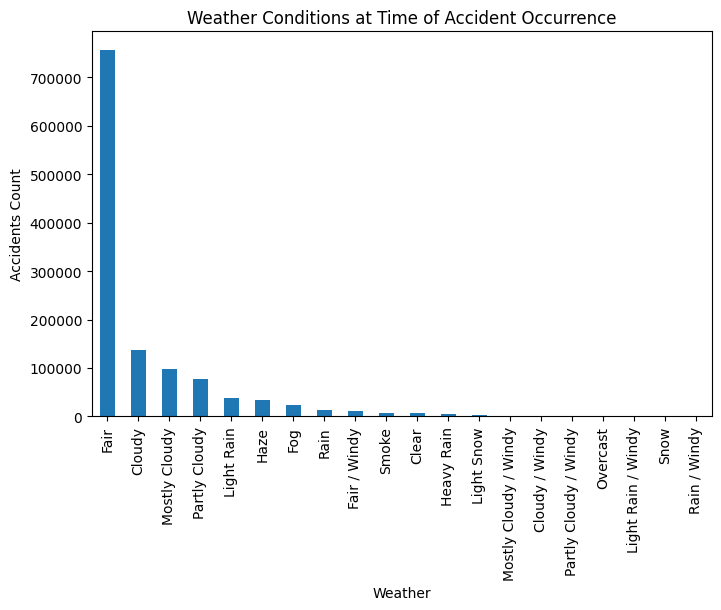

In [46]:
top_weather_conditions = df1['Weather_Condition'].value_counts().nlargest(20)

# Plotting the top 20 weather conditions
fig, ax = plt.subplots(figsize=(8, 5))
top_weather_conditions.plot(kind='bar', ax=ax)

# Set the title and labels
ax.set(title='Weather Conditions at Time of Accident Occurrence',
       xlabel='Weather',
       ylabel='Accidents Count')

# Display the plot
plt.show()

### most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

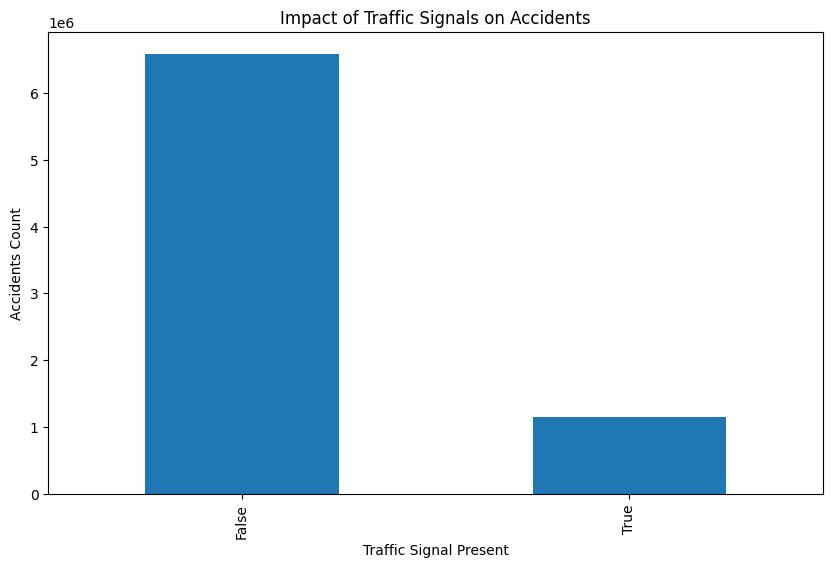

In [50]:
# Example: Analyzing the impact of traffic signals on accidents
traffic_signal_accidents = df['Traffic_Signal'].value_counts()

# Plotting the impact of traffic signals
fig, ax = plt.subplots(figsize=(10, 6))
traffic_signal_accidents.plot(kind='bar', ax=ax)

# Set the title and labels
ax.set(title='Impact of Traffic Signals on Accidents',
       xlabel='Traffic Signal Present',
       ylabel='Accidents Count')

# Display the plot
plt.show()
